# Classification

* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.



## Create data

We will use make_circels function to make a large circle containing a smaller circle in 2d.

A simple toy dataset to visualize clustering and classification algorithms.

In [1]:
from sklearn.datasets import make_circles

# Number of samples
n_samples = 1000
X, y = make_circles (n_samples,
                    noise=0.03,
                    random_state=42) # This data is binary class classification

In [2]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
y[:15]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [4]:
X.ndim, X.shape

(2, (1000, 2))

In [5]:
# Visulize the data in dataframe
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


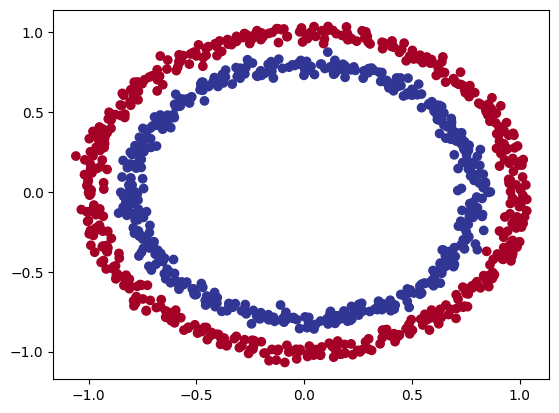

In [6]:
# Visulize by plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

## Model 1: Try simple Neural Network on the data

In [8]:
# Model in nuaral network       # the data is numpy array and its work perfectliy with tensorflow
import tensorflow as tf

tf.random.set_seed(42)

model_1 =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss =tf.keras.losses.BinaryCrossentropy(),
                optimizer =tf.keras.optimizers.SGD(),
                metrics =["accuracy"])
history= model_1.fit(X ,y ,epochs=5, verbose=0)

In [9]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5060


[0.6934818625450134, 0.5059999823570251]

### Plot our model prediction

In [10]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


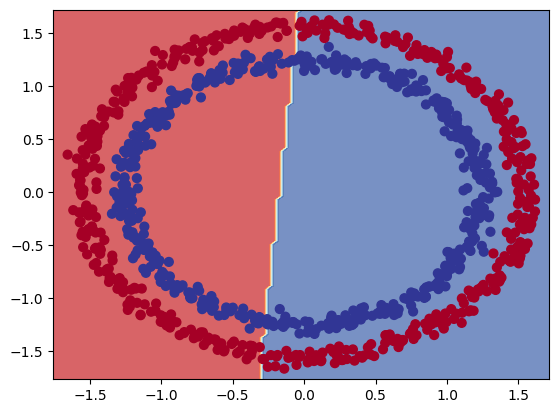

In [11]:
plot_decision_boundary(model=model_1, X=X ,y=y)

## Model 2

In [12]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])
model_2.compile(loss="BinaryCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
history= model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 5.5631 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4446 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3914 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3035 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1756 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9309 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6602 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5175 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4987 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4773 - accuracy: 0.4710
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


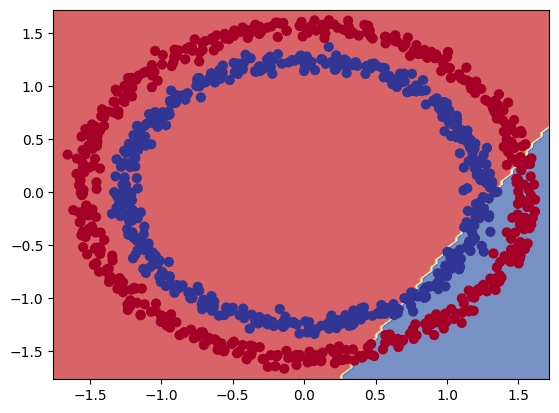

In [13]:
plot_decision_boundary(model=model_2, X=X ,y=y)

## Model 3: model with activation function

In [14]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")

])
model_3.compile(loss = "BinaryCrossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
history= model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6978 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5040
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4970
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4970
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5010
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5000
Epoch 11/

In [15]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5324 - accuracy: 0.8080


[0.5323604345321655, 0.8080000281333923]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


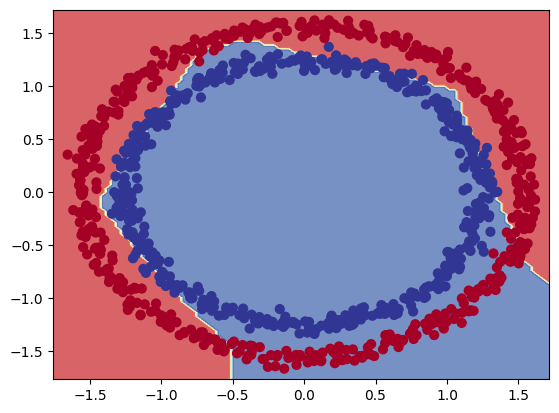

In [16]:
plot_decision_boundary(model_3,X,y)

## Make sigmoid function

In [17]:
A= tf.range(-10,10, dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

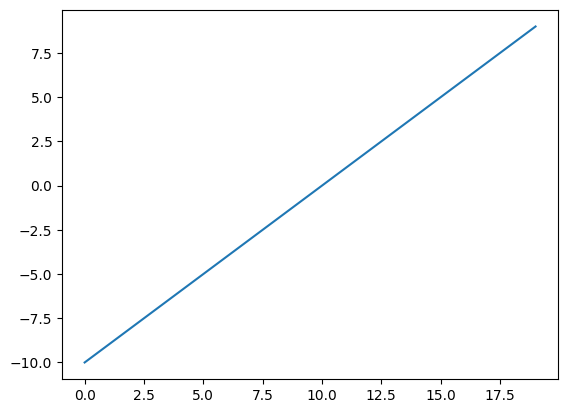

In [18]:
plt.plot(A)

In [19]:
# Sigmoid function
def sigmoid(x):
  return 1 / (1+tf.exp(-x))


In [20]:
As=sigmoid(A)
As

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

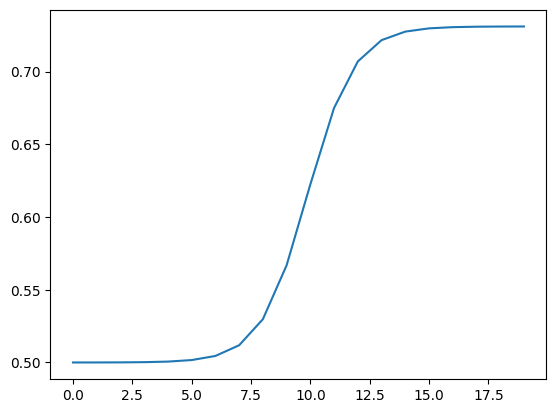

In [21]:
plt.plot(sigmoid(As))

***Sigmoid used the straight lines in nueral network model above to caurve them to fit the model courctly***

## Make relu function

In [22]:
def relu(x):
  return tf.maximum(0,x)

In [23]:
Ar=relu(A)
Ar

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

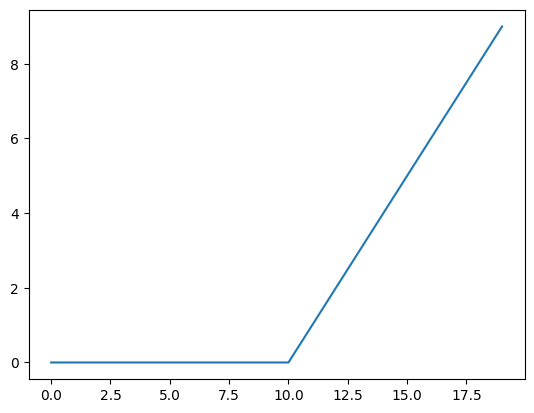

In [24]:
plt.plot(Ar)

In [25]:
# linear function do no thing
Al=tf.keras.activations.linear(A)
Al, A == tf.keras.activations.linear(A)

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=bool, numpy=
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])>)

## Model 4: Improve the classification model

In [26]:
# We will spilt the data to evaluate the model correctly
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape ,X_test.shape , y_train.shape ,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [27]:
from tensorflow.python import metrics
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.01),
                metrics=['accuracy'])
history_model_4 = model_4.fit(X_train, y_train, epochs= 25)

Epoch 1/25
25/25 [==============================] - 2s 5ms/step - loss: 0.6956 - accuracy: 0.4925
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5200
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5325
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5337
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5362
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.5638
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6125
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.6550
Epoch 9/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6424 - accuracy: 0.6625
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6220 - accuracy: 0.7088
Epoch 11/25
25/25 [

In [28]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2800 - accuracy: 0.9050


[0.2800418734550476, 0.9049999713897705]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


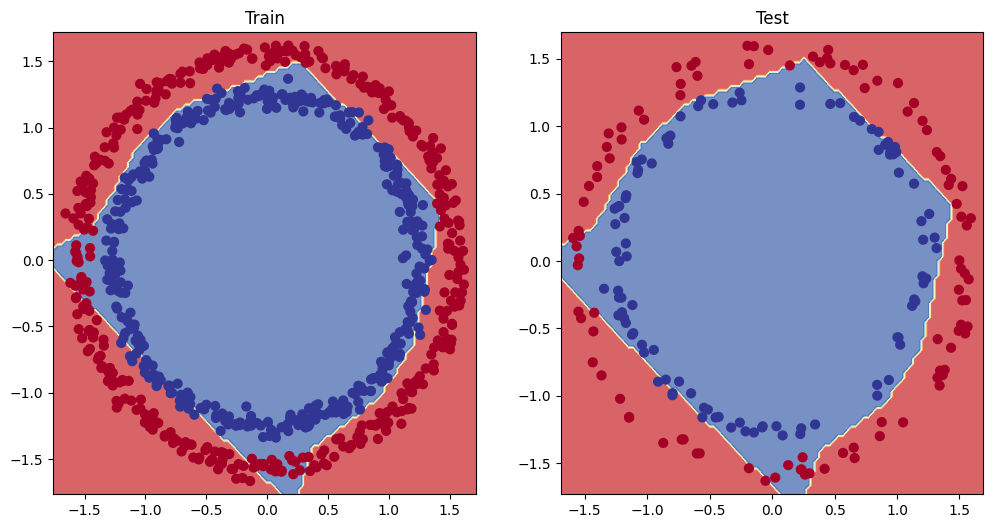

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4, X=X_test, y=y_test)

## Plot the loss

In [30]:
pd.DataFrame(history_model_4.history)

,loss,accuracy
0,0.695643,0.49250
1,0.688926,0.52000
2,0.685198,0.53250
3,0.683054,0.53375
4,0.681594,0.53625
5,0.675922,0.56375
6,0.668370,0.61250
7,0.657661,0.65500
8,0.642397,0.66250
9,0.621953,0.70875


Text(0.5, 1.0, 'Training loss curves')

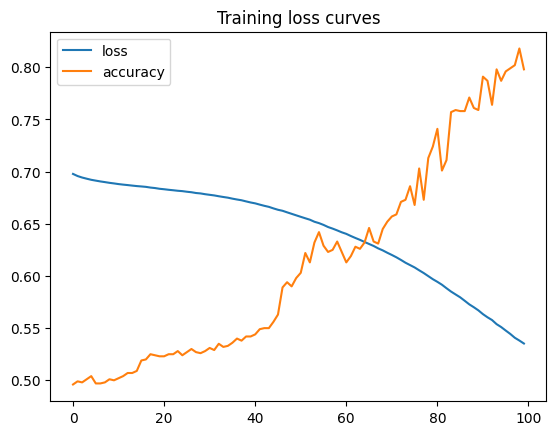

In [31]:
pd.DataFrame(history.history).plot()
plt.title('Training loss curves')   # We can use the loss curve to finde the best learning rate

## Fineding the best learning rate

The standered learning rate with Adam optimizer (0.001) is the best and if you want to change it you can try (1, 0.1, 0.01, 0.0001) or you can use the callback.

In [32]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.01),
                metrics=['accuracy'])
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # The shit between practes is the equation of the lr change

history= model_5.fit(X_train, y_train, epochs=100,callbacks=[lr_callback])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5163 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5138 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5163 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5175 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5150 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5163 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5150 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5138 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [33]:
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4950


[0.6934003233909607, 0.4950000047683716]

<Axes: >

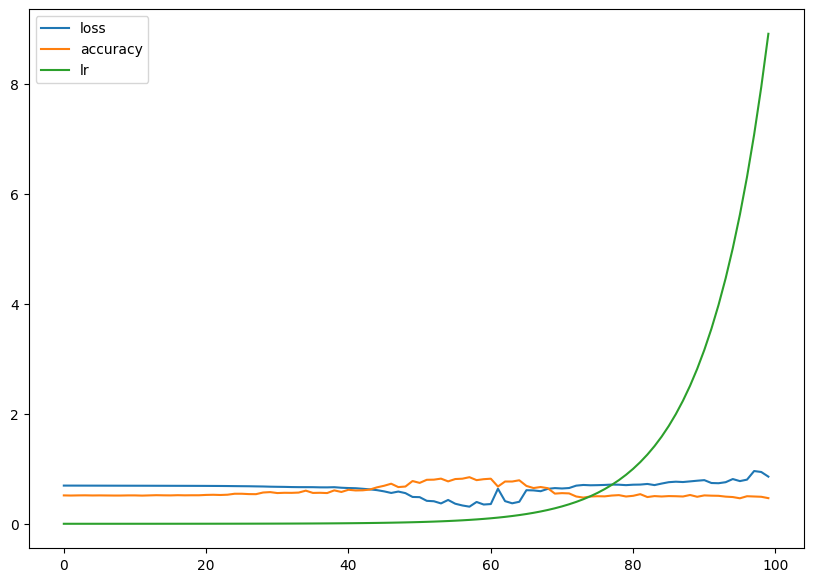

In [34]:
pd.DataFrame(history.history).plot(figsize=(10,7))

Text(0.5, 1.0, 'Learning ravt vs Loss')

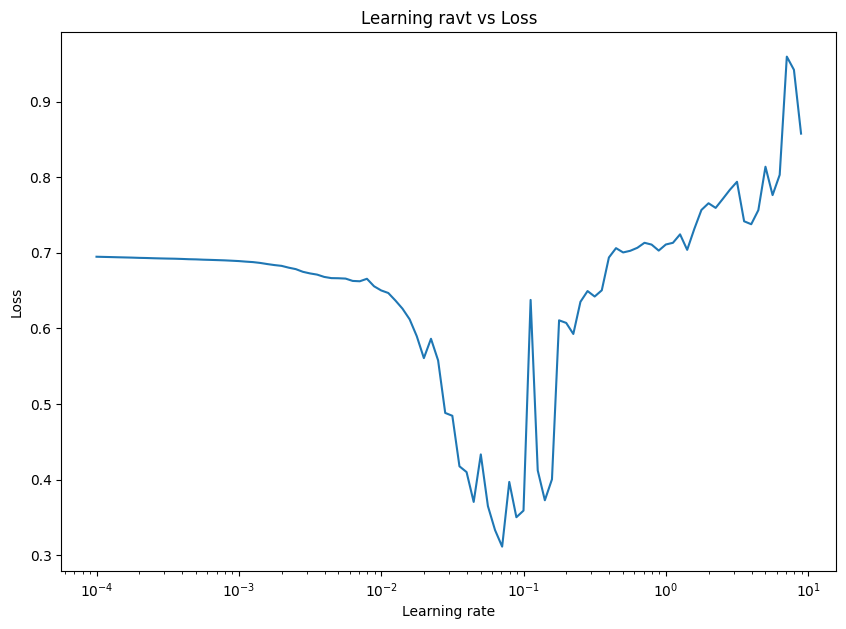

In [35]:
lrs = 1e-4 * (10 ** (tf.range(100)/20)) # See slide 19
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])  #This is the main function    #Find the value of learning rate whear the loss curve decreasing faster and the ideal learning rate will be between the lowest poin in the curve and ten times smaler than that point
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning ravt vs Loss')

In [36]:
10**-2

0.01

In [37]:
# Test the best learning rate for model_5
tf.random.set_seed(42)
model_6= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model_6.compile(loss= 'BinaryCrossentropy',
                optimizer = tf.keras.optimizers.Adam(0.05), # I got unmeaningfull resultes
                metrics=['accuracy'])

history = model_6.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5138
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5850
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.6662
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7613
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7900
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8150
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8462
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8537
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8288
Epoch 11/25
25/25 [

In [38]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.8700


[0.35406386852264404, 0.8700000047683716]

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_6.predict(X_test)
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_pred

array([[6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [2.0310782e-02],
       [6.2533575e-01],
       [8.1630866e-04],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [4.9234591e-02],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [1.1488140e-02],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [1.9626318e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [9.5041096e-03],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.1239421e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.2533575e-01],
       [6.253357

In [ ]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

It looks like we need to get our predictions into the binary format (0 or 1)

In their current format (9.8526537e-01), they're in a form called prediction probabilities which is the output of the sigmoid and softmax.

We will use **tf.round()** which will rounds the values of a tensor to the nearest integer

In [ ]:
tf.round(y_pred)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
 

In [ ]:
confusion_matrix(y_test, tf.round(y_pred))

array([[43, 58],
       [ 2, 97]])

In [ ]:
# Now lets make our confusion matrix prettier
   # I skip it pechyaka

# Put things toghther

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [39]:
import tensorflow as tf
import pandas as pd

In [40]:
#The data
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [42]:
train_data.shape

(60000, 28, 28)

In [41]:
test_data.shape

(10000, 28, 28)

In [43]:
print(f"Example of {train_data[0]} \n")
print(f"label {train_labels[0]} \n")

Example of [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0

In [ ]:
# The shape of each example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

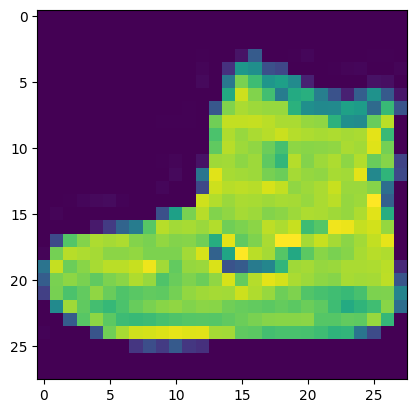

In [37]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [44]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Bag')

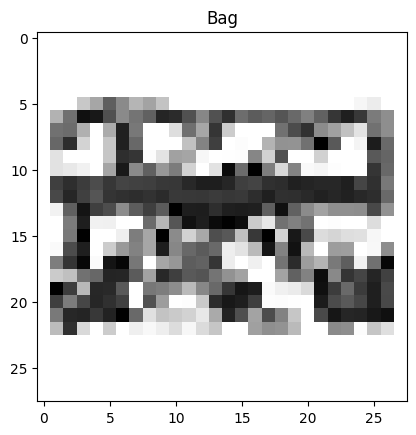

In [45]:
index = 10000
plt.imshow(train_data[index], cmap=plt.cm.binary) # cm: color map
plt.title(class_names[train_labels[index]])

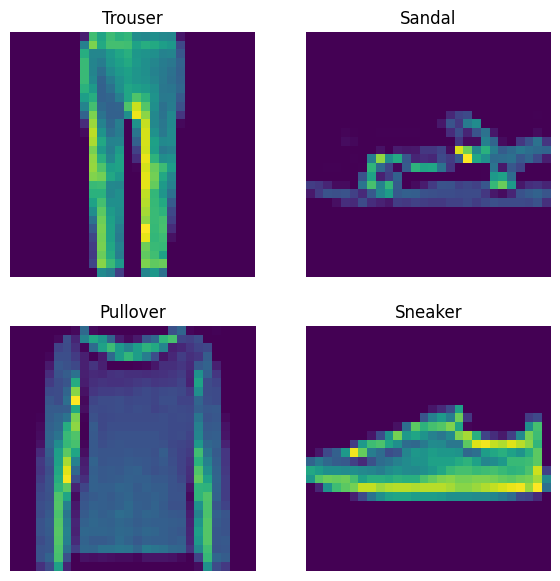

In [47]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

The model need
* Input shape = 28x28 (the shape of each image)
* Output shape = 10( one per class)
* Loss function = tf.keras.losses.categoricalCrossentropy()
* Output layer activation = Softmax

In [48]:
# Our model for multiclass classification

tf.random.set_seed(42)
# Creat the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])
# Compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer ='Adam',
              metrics=['accuracy'])
history_model = model.fit(train_data,
                   train_labels,
                   epochs=10,
                   validation_data=(test_data,test_labels))  #We will use the validation data to see who good our model paterns are on unseen data
                   # We can use the (categoricalCrossentropy()) if the labels in one hot encoder
                   # We can make them in one-hot-encoder by (tf.one_hot())

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3485 - accuracy: 0.0991 - val_loss: 2.2883 - val_accuracy: 0.1066
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3019 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3020 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3025 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3025 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Normalize the data
train_data.min(), train_data[0].max()

(0, 255)

In [51]:
norm_train_data = train_data /255
norm_test_data = test_data /255

print((norm_train_data.min() , norm_train_data.max()))
print((norm_test_data.min(), norm_test_data.max()))

(0.0, 1.0)
(0.0, 1.0)


In [52]:
# Model for data after normalization
tf.random.set_seed(42)
# Creat the model
model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])
# Compile the model
model_norm.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer ='Adam',
              metrics=['accuracy'])
history_model_norm = model_norm.fit(norm_train_data,
                   train_labels,
                   epochs=10,
                   validation_data=(norm_test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4613 - accuracy: 0.4207 - val_loss: 1.2424 - val_accuracy: 0.5188
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9568 - accuracy: 0.6141 - val_loss: 0.8104 - val_accuracy: 0.6828
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7296 - accuracy: 0.7298 - val_loss: 0.7116 - val_accuracy: 0.7486
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6569 - accuracy: 0.7657 - val_loss: 0.6728 - val_accuracy: 0.7619
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6303 - accuracy: 0.7732 - val_loss: 0.6491 - val_accuracy: 0.7703
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6149 - accuracy: 0.7784 - val_loss: 0.6456 - val_accuracy: 0.7707
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6042 - accuracy: 0.7822 - val_loss: 0.6464 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

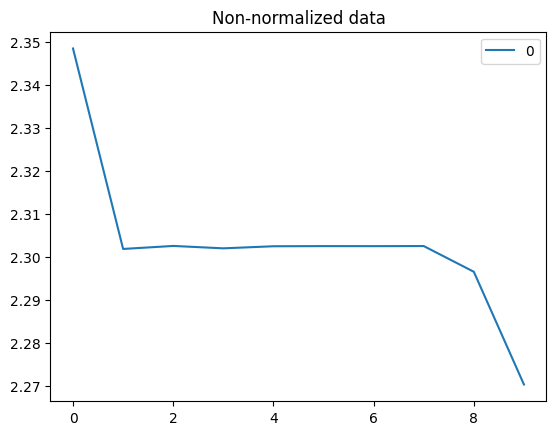

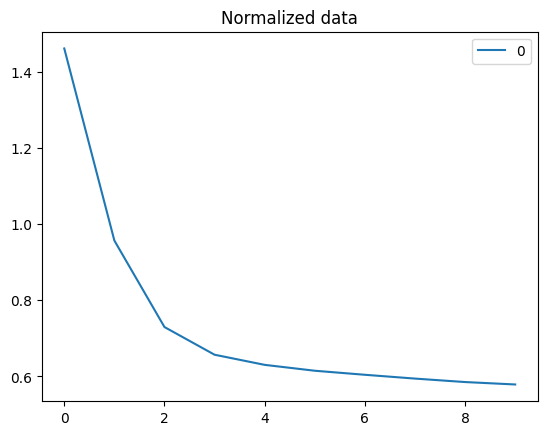

In [53]:
pd.DataFrame(history_model.history['loss']).plot(title="Non-normalized data")
pd.DataFrame(history_model_norm.history['loss']).plot(title="Normalized data")

🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

In [54]:
# Finde the best learning rate
tf.random.set_seed(42)
# The model creation
model_lr = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='Softmax')
])
# Compile the model_lr
model_lr.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics= ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_lr= model_lr.fit(norm_train_data,
                         train_labels,
                         epochs = 40,
                         validation_data=(norm_test_data,test_labels))

Epoch 1/40
1875/1875 [==============================] - 6s 2ms/step - loss: 1.9017 - accuracy: 0.2304 - val_loss: 1.7536 - val_accuracy: 0.2770
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5988 - accuracy: 0.3130 - val_loss: 1.5197 - val_accuracy: 0.3287
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4351 - accuracy: 0.3596 - val_loss: 1.4002 - val_accuracy: 0.3870
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3373 - accuracy: 0.4322 - val_loss: 1.2955 - val_accuracy: 0.4682
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2495 - accuracy: 0.4808 - val_loss: 1.2354 - val_accuracy: 0.5090
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1906 - accuracy: 0.5214 - val_loss: 1.1753 - val_accuracy: 0.5494
Epoch 7/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1261 - accuracy: 0.5609 - val_loss: 1.1172 - val_accuracy:

In [57]:
1e-3, 10**-3, 10**-2

(0.001, 0.001, 0.01)

Text(0.5, 1.0, 'Learning rate vs Loss')

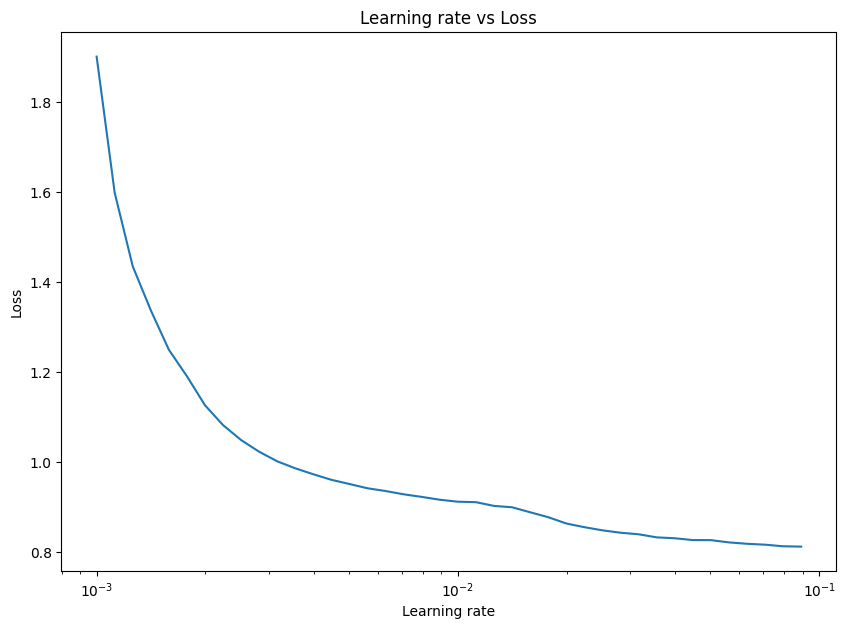

In [56]:
lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_lr.history['loss'])  #This is the main function  #Find the value of learning rate whear the loss curve decreasing faster and the ideal learning rate will be between the lowest poin in the curve and ten times smaler than that point
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')

In [58]:
# Finde the best learning rate
tf.random.set_seed(42)
# The model creation
model_f = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='Softmax')
])
# Compile the model_lr
model_f.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(0.001),
                 metrics= ['accuracy'])

history= model_f.fit(norm_train_data,
                         train_labels,
                         epochs = 40,
                         validation_data=(norm_test_data,test_labels))

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3347 - accuracy: 0.5625 - val_loss: 0.9930 - val_accuracy: 0.7053
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8689 - accuracy: 0.7325 - val_loss: 0.8298 - val_accuracy: 0.7299
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7553 - accuracy: 0.7482 - val_loss: 0.7405 - val_accuracy: 0.7425
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6863 - accuracy: 0.7598 - val_loss: 0.7008 - val_accuracy: 0.7530
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6635 - accuracy: 0.7654 - val_loss: 0.6864 - val_accuracy: 0.7527
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6488 - accuracy: 0.7691 - val_loss: 0.6710 - val_accuracy: 0.7586
Epoch 7/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6382 - accuracy: 0.7716 - val_loss: 0.6755 - val_accuracy:

In [59]:
# Evaluate the model
model_f.evaluate(norm_test_data, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5938 - accuracy: 0.7921


[0.5937954783439636, 0.7921000123023987]

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):

  # Set up a random integer
  i = random.randint(0, len(images))

  # Create prediction nad targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_labels = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depend on if the prediction right or wrong
  if pred_label == true_labels:
    color='green'
  else:
    color='red'

  # Add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (true:{})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_labels),
             color=color)

1/1 [==============================] - 0s 36ms/step


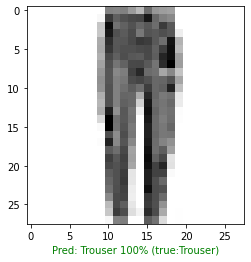

In [ ]:
plot_random_image(model = model_f,
                  images = norm_test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [ ]:
# The layers of some model
model_f.layers

In [ ]:
model_f.layers[0]

In [ ]:
# Get the pattern of the layer in our network
weights ,biases = model_f.layers[1].get_weights()
weights, weights.shape

(array([[ 1.0043904e-03, -3.9576864e-01,  1.1489567e+00, -5.0824255e-01],
        [ 2.7386479e-02,  1.5979773e-01, -3.8330138e-01, -1.0654473e+00],
        [-2.0900218e-02, -1.9444835e+00,  2.4086763e-01, -7.2720194e-01],
        ...,
        [-1.1427387e-01, -3.0744570e-01, -1.0292157e-01, -1.2113776e-01],
        [-7.7385522e-02,  2.3755866e-01,  1.4316341e-01, -1.4912668e-01],
        [-5.9493415e-02,  2.8071541e-01, -4.6592140e-01, -3.1863382e-01]],
       dtype=float32), (784, 4))

In [ ]:
biases, biases.shape

(array([-0.03548132,  2.7706354 ,  1.2756233 ,  1.6394962 ], dtype=float32),
 (4,))